# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("Resources/sinasc_RO_2019.csv")
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

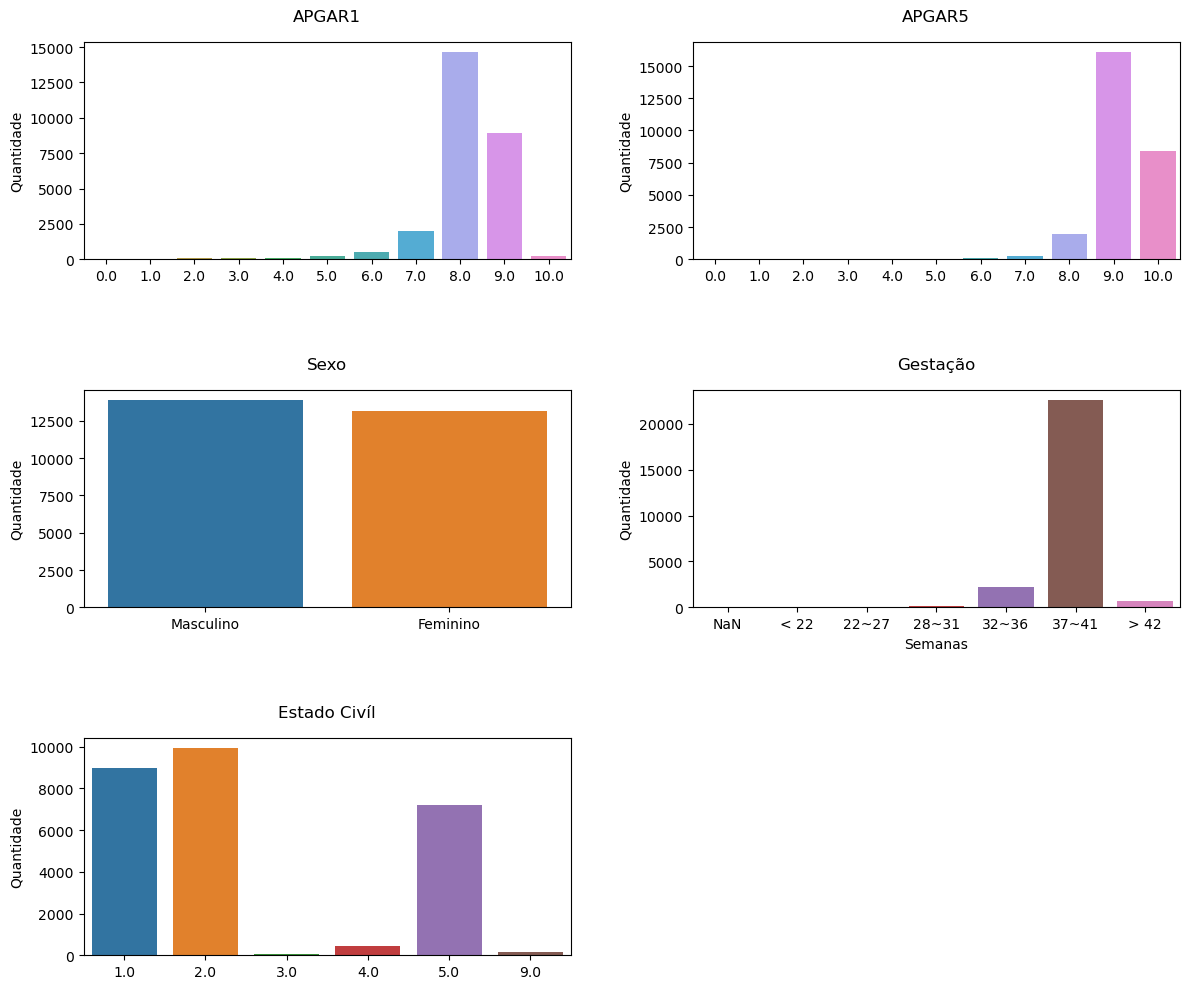

In [5]:
#parâmetros para ageitar o gráfico
colunas_titulo = ['APGAR1', 'APGAR5', 'Sexo', 'Gestação', 'Estado Civíl']
gestacao_order = ['Ignorado', 'Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
gestacao_labels = ['NaN', '< 22', '22~27', '28~31', '32~36', '37~41', '> 42']

#criação do eixo
plt.close('all')
plt.rc('figure', figsize=(12, 10))
fig, axes = plt.subplots(3, 2)

#plotagem
sns.countplot(ax = axes[0, 0], x='APGAR1', data=df)
sns.countplot(ax = axes[0, 1], x='APGAR5', data=df)
sns.countplot(ax = axes[1, 0], x='SEXO', data=df)
sns.countplot(ax = axes[1, 1], x='GESTACAO', data=df, order=gestacao_order)
sns.countplot(ax = axes[2, 0], x='ESTCIVMAE', data=df)

#pequena função para mudar o título e as labels dos eixos x e y
for ax, col in zip(axes.flatten(), colunas_titulo):
    ax.set_title(col, pad=15)
    ax.set_xlabel('')
    ax.set_ylabel('Quantidade')
    
#Alguns ajustes da gestação
axes[1, 1].set_xticklabels(gestacao_labels)
axes[1, 1].set_xlabel('Semanas')

#ajustes finais e mostrando o gráfico
fig.delaxes(axes[2, 1])

plt.tight_layout()  
plt.subplots_adjust(wspace=0.25, hspace=0.6)
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

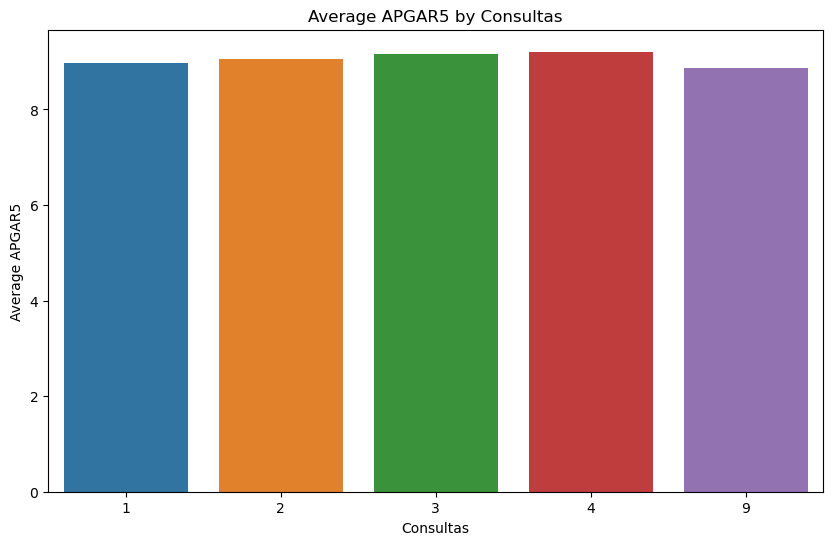

In [7]:
# Agrupando o dataframe por 'consultas' e calculando a média de cada grupo
avg_apgar5_by_consultas = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# Criação do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=avg_apgar5_by_consultas)

# Mudando os labels
plt.xlabel('Consultas')
plt.ylabel('Average APGAR5')
plt.title('Average APGAR5 by Consultas')

# mostrando plot
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

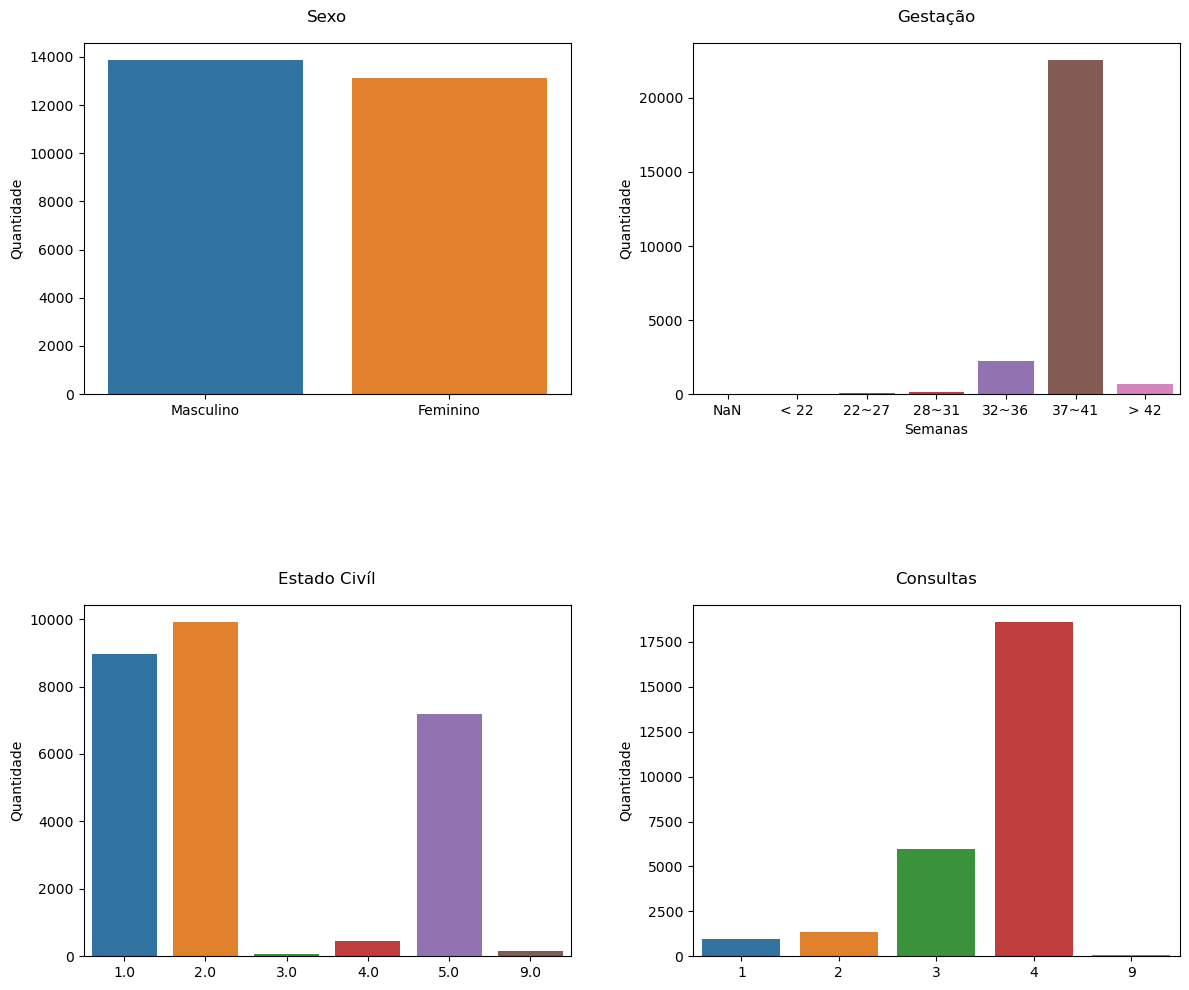

In [9]:
#parâmetros para ageitar o gráfico
colunas_titulo = ['Sexo', 'Gestação', 'Estado Civíl', 'Consultas']
gestacao_order = ['Ignorado', 'Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
gestacao_labels = ['NaN', '< 22', '22~27', '28~31', '32~36', '37~41', '> 42']
axes[0, 1].set_xticks(range(len(gestacao_labels)))
axes[0, 1].set_xticklabels(gestacao_labels)

#criação do eixo
plt.close('all')
plt.rc('figure', figsize=(12, 10))
fig, axes = plt.subplots(2, 2)

#plotagem
sns.countplot(ax = axes[0, 0], x='SEXO', data=df)
sns.countplot(ax = axes[0, 1], x='GESTACAO', data=df, order=gestacao_order)
sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data=df)
sns.countplot(ax = axes[1, 1], x='CONSULTAS', data=df)

#pequena função para mudar o título e as labels dos eixos x e y
for ax, col in zip(axes.flatten(), colunas_titulo):
    ax.set_title(col, pad=15)
    ax.set_xlabel('')
    ax.set_ylabel('Quantidade')
    
#Alguns ajustes da gestação
axes[0, 1].set_xticklabels(gestacao_labels)
axes[0, 1].set_xlabel('Semanas')

#ajustes finais e mostrando o gráfico
plt.tight_layout()  
plt.subplots_adjust(wspace=0.25, hspace=0.6)
plt.show()

# Tarefa 2

#### 1) Na base do SINASC do DataSUS, faça um boxplot da idade da mãe.
#### 2) Faça um boxplot do peso do bebê
#### 3) Faça um histograma da idade da mãe
#### 4) Faça um histograma do peso do bebê




In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [57]:
#df.columns
#df.head()

<Axes: >

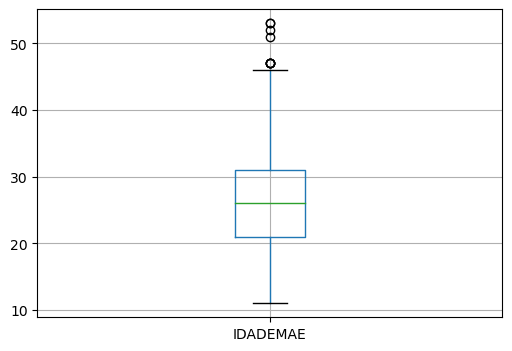

In [49]:
#1)
df.boxplot(column=['IDADEMAE'], figsize=(6,4))

<Axes: >

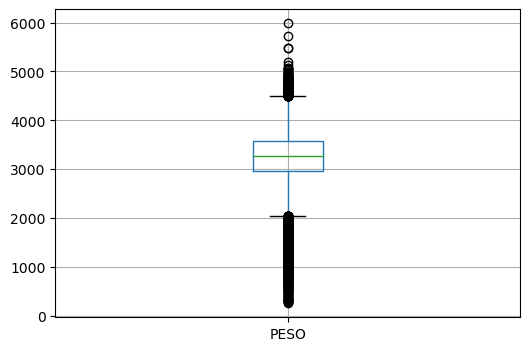

In [59]:
#2)
df.boxplot(column=['PESO'], figsize=(6,4))

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


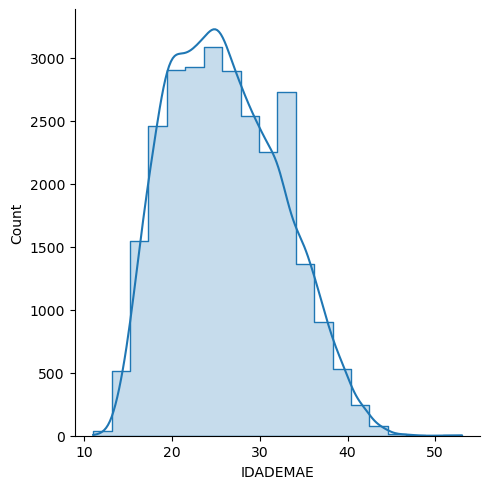

In [68]:
#3)
sns.displot(data = df 
            ,alpha = .25
            ,x = 'IDADEMAE'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


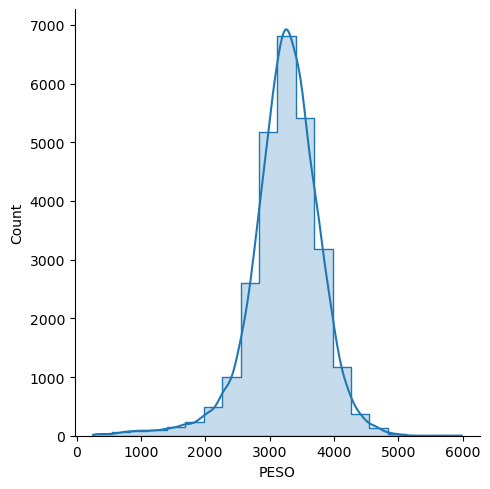

In [76]:
#4)
sns.displot(data = df 
            ,alpha = .25
            ,x = 'PESO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )